#Aim- Inplementation of models to predict Customer churn analysis.

In [ ]:
### Packages installed for this dataset.
install.packages("ggplot")
install.packages("ggpubr")
install.packages("tidyverse")
install.packages("randomForest")
install.packages("MASS")

In [10]:
### Library used.
library(plyr)
library(utils)
library(ggplot2)
library(caTools)
library(Metrics)
library(ggpubr)
library(rpart)
library(ggplot2)
library(lubridate)
library(corrplot)
library(cowplot)
library(tidyverse)
library(caret)
library(pROC)

Warning message:
"package 'plyr' was built under R version 4.2.2"
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'caTools' was built under R version 4.2.2"
Warning message:
"package 'Metrics' was built under R version 4.2.2"
Warning message:
"package 'ggpubr' was built under R version 4.2.2"

Attaching package: 'ggpubr'


The following object is masked from 'package:plyr':

    mutate


Warning message:
"package 'lubridate' was built under R version 4.2.2"
Loading required package: timechange

Warning message:
"package 'timechange' was built under R version 4.2.2"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'corrplot' was built under R version 4.2.2"
corrplot 0.92 loaded

Warning message:
"package 'cowplot' was built under R version 4.2.2"

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

   

In [3]:
### Reading data set in csv file.###
customer_churn <- read.csv('C:/Users/Sarthak/OneDrive/Desktop/DMML/Dataset 3/WA_Fn-UseC_-Telco-Customer-Churn.csv', header = T, stringsAsFactors = T)
head(customer_churn)
str(customer_churn)
tail(customer_churn)
dim(customer_churn)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 1 2 ...
 $ OnlineBackup    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 2 1 1 2 ...
 $ DeviceProtection: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ TechSupport     : Fac

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
7038,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,⋯,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,⋯,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7043,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,⋯,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


[1] 7043   21

In [4]:
### Checking the presence of Null Values.###
sapply(customer_churn, function(x) sum(is.na(x)))
sum(is.na(customer_churn$TotalCharges)) ###Null values in TotalCharges column###

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

[1] 11

In [5]:
### remove NAs from data. ###
churn_no_na <- na.omit(customer_churn)
dim(churn_no_na)

[1] 7032   21

In [6]:
###No missing values found in churn_no_na. ###
sum(is.na(churn_no_na))

[1] 0

In [7]:
###Removing unnecessary columns. ###
cols_to_be_removed=c("customerID")
churn_no_na = churn_no_na[,!(names(churn_no_na) %in% cols_to_be_removed) ]
str(churn_no_na)

'data.frame':	7032 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 1 2 ...
 $ OnlineBackup    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 2 1 1 2 ...
 $ DeviceProtection: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ TechSupport     : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 2 1 ...
 $ StreamingTV     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...

In [8]:
churn_no_na$tenure = as.numeric(churn_no_na$tenure)
str(churn_no_na)

'data.frame':	7032 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : num  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 1 2 ...
 $ OnlineBackup    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 2 1 1 2 ...
 $ DeviceProtection: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ TechSupport     : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 2 1 ...
 $ StreamingTV     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...

In [11]:
# map the values to change. ###
churn_no_na$SeniorCitizen <- as.factor(mapvalues(churn_no_na$SeniorCitizen, from=c("0","1"), to=c("No", "Yes")))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   29.00   32.42   55.00   72.00 

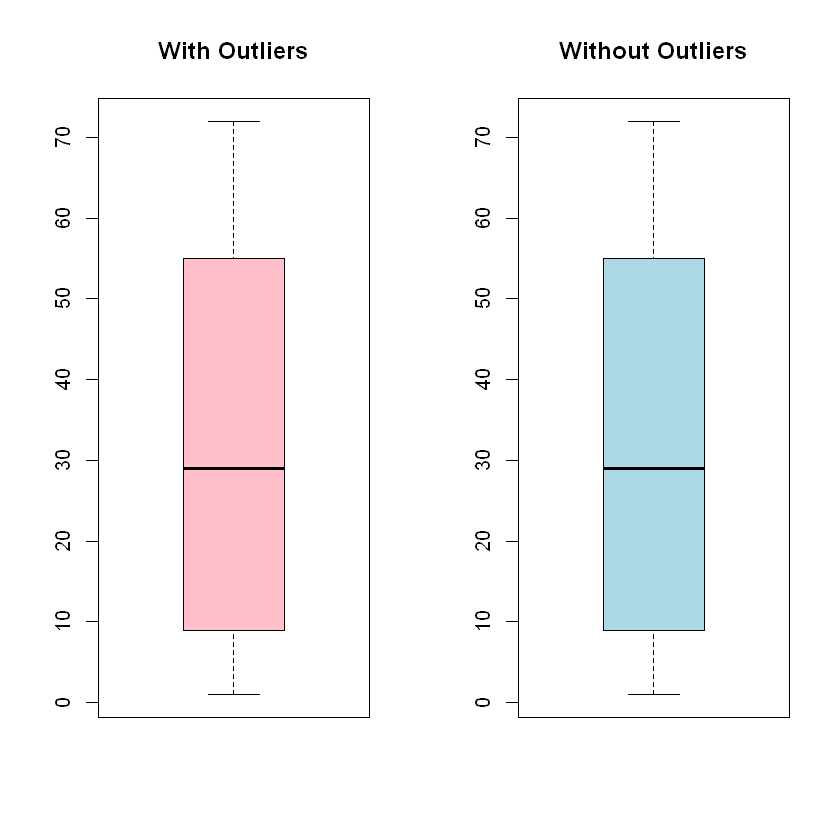

In [12]:
#Attribute - tenure
par(mfrow=c(1,2))
boxplot(churn_no_na$tenure, col = "pink", main="With Outliers") #Attribute with Outliers
#Removing outliers in tenure attribute
p75 = quantile(churn_no_na$tenure,0.75, na.rm = TRUE)
p25 = quantile(churn_no_na$tenure,0.25, na.rm = TRUE)
# print(p75)
# print(p25)
iqr = p75-p25

churn_no_na$tenure = ifelse(churn_no_na$tenure<p25-1.5*iqr,ave(churn_no_na$tenure, FUN = function(x) p25-1.5*iqr),churn_no_na$tenure)
churn_no_na$tenure = ifelse(churn_no_na$tenure>p75+1.5*iqr,ave(churn_no_na$tenure, FUN = function(x) p75+1.5*iqr),churn_no_na$tenure)
boxplot(churn_no_na$tenure, col ="lightblue", main="Without Outliers") # Attribute without outliers
summary(churn_no_na$tenure)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.25   35.59   70.35   64.80   89.86  118.75 

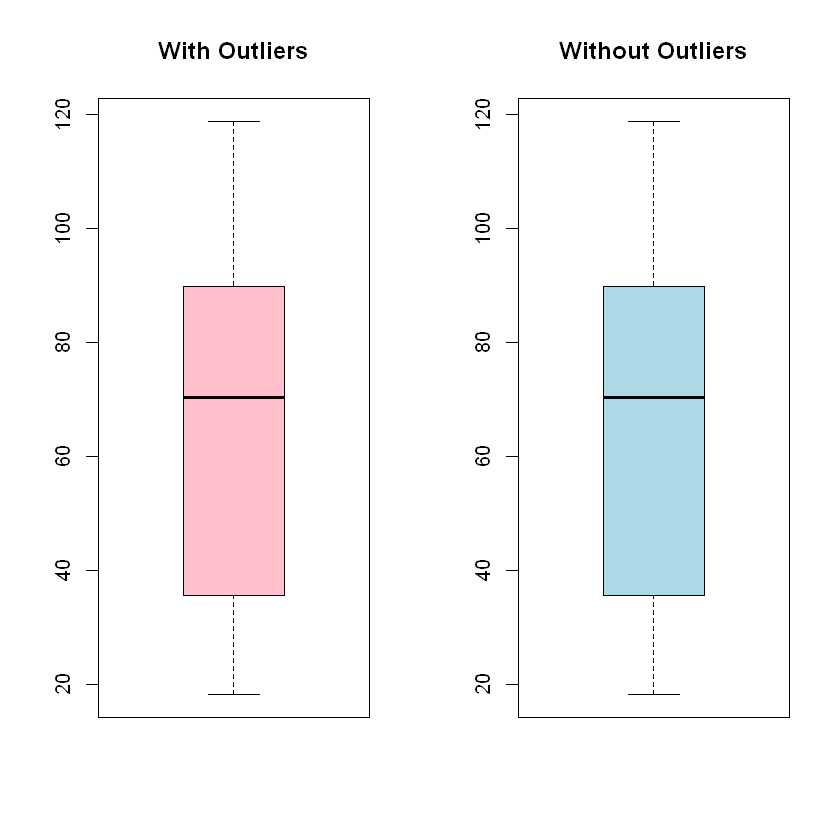

In [13]:
#Attribute - MonthlyCharges. ###
par(mfrow=c(1,2))
boxplot(churn_no_na$MonthlyCharges, col = "pink", main="With Outliers") #Attribute with Outliers
#Removing outliers in MonthlyCharges attribute
p75 = quantile(churn_no_na$MonthlyCharges,0.75, na.rm = TRUE)
p25 = quantile(churn_no_na$MonthlyCharges,0.25, na.rm = TRUE)
# print(p75)
# print(p25)
iqr = p75-p25

churn_no_na$MonthlyCharges = ifelse(churn_no_na$MonthlyCharges<p25-1.5*iqr,ave(churn_no_na$MonthlyCharges, FUN = function(x) p25-1.5*iqr),churn_no_na$MonthlyCharges)
churn_no_na$MonthlyCharges = ifelse(churn_no_na$MonthlyCharges>p75+1.5*iqr,ave(churn_no_na$MonthlyCharges, FUN = function(x) p75+1.5*iqr),churn_no_na$MonthlyCharges)
boxplot(churn_no_na$MonthlyCharges, col ="lightblue", main="Without Outliers") # Attribute without outliers
summary(churn_no_na$MonthlyCharges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   18.8   401.4  1397.5  2283.3  3794.7  8684.8 

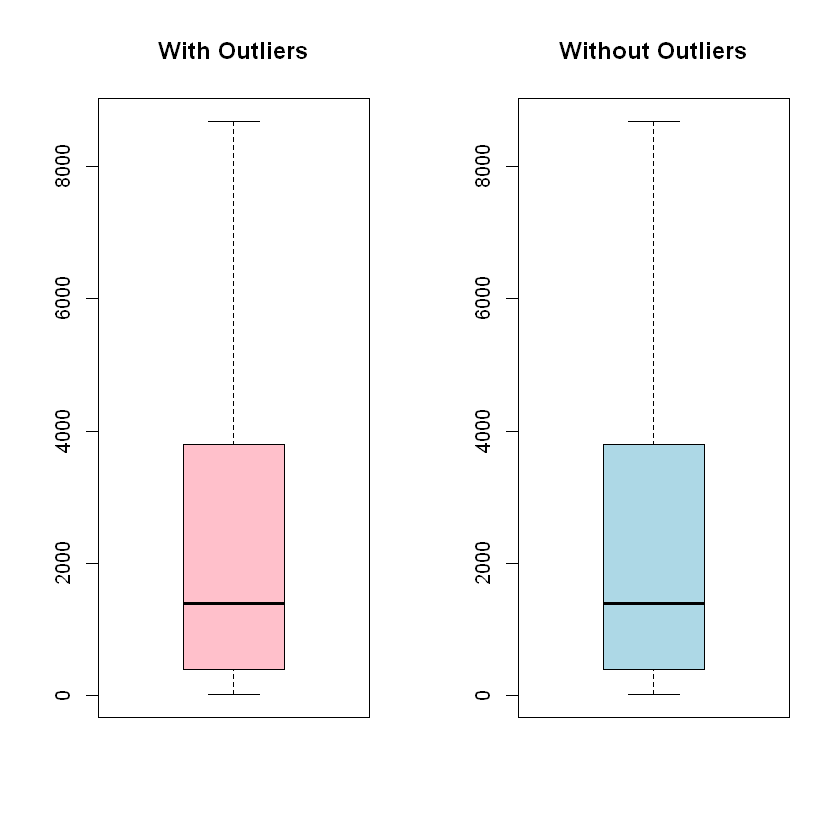

In [14]:
#Attribute - TotalCharges. ###
par(mfrow=c(1,2))
boxplot(churn_no_na$TotalCharges, col = "pink", main="With Outliers") #Attribute with Outliers
#Removing outliers in MonthlyCharges attribute
p75 = quantile(churn_no_na$TotalCharges,0.75, na.rm = TRUE)
p25 = quantile(churn_no_na$TotalCharges,0.25, na.rm = TRUE)
# print(p75)
# print(p25)
iqr = p75-p25

churn_no_na$TotalCharges = ifelse(churn_no_na$TotalCharges<p25-1.5*iqr,ave(churn_no_na$TotalCharges, FUN = function(x) p25-1.5*iqr),churn_no_na$TotalCharges)
churn_no_na$TotalCharges = ifelse(churn_no_na$TotalCharges>p75+1.5*iqr,ave(churn_no_na$TotalCharges, FUN = function(x) p75+1.5*iqr),churn_no_na$TotalCharges)
boxplot(churn_no_na$TotalCharges, col ="lightblue", main="Without Outliers") # Attribute without outliers
summary(churn_no_na$TotalCharges)

[1] 7032    3

,tenure,MonthlyCharges,TotalCharges
tenure,1.0000000,0.2468618,0.8258805
MonthlyCharges,0.2468618,1.0000000,0.6510648
TotalCharges,0.8258805,0.6510648,1.0000000


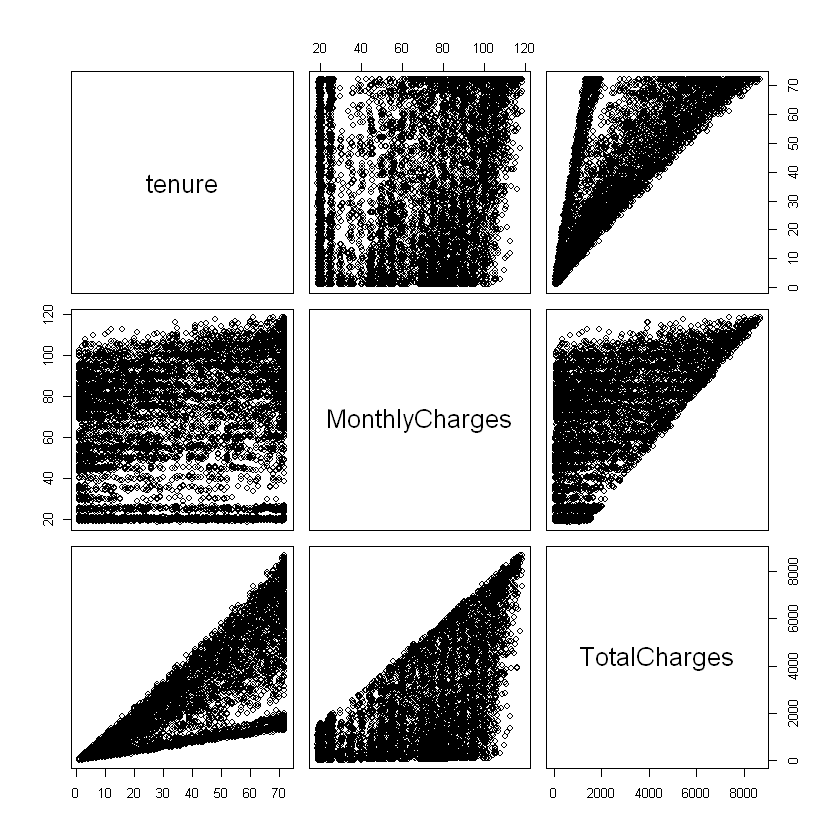

In [16]:
### filtering data with numeric variables to run correlation. ###

churn_only_num <- Filter(is.numeric, churn_no_na)

dim(churn_only_num)
cor(churn_only_num)

plot(churn_only_num)

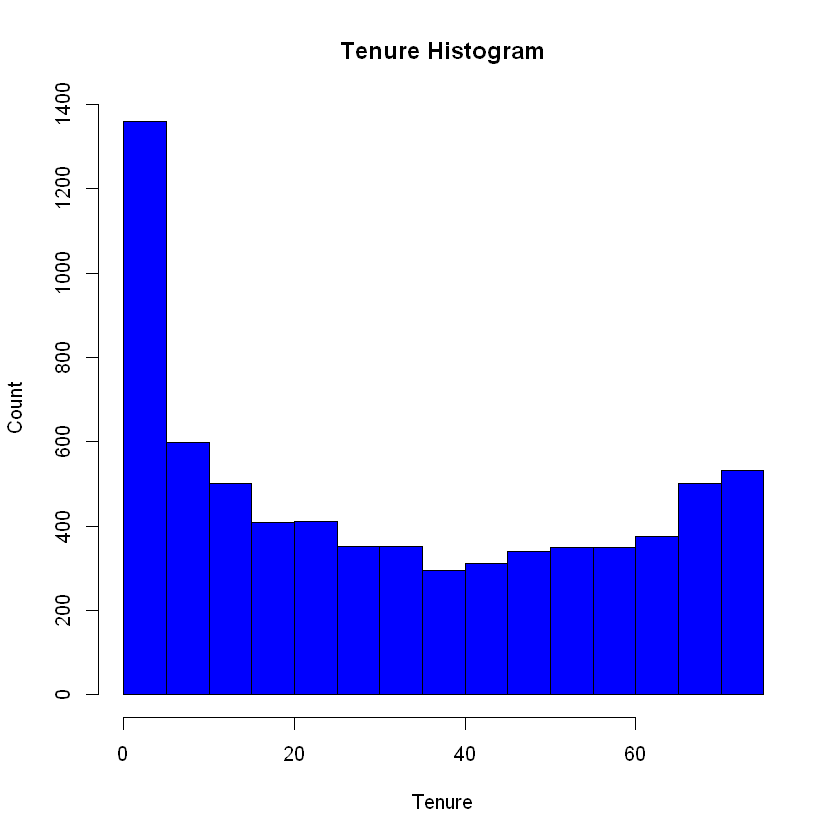

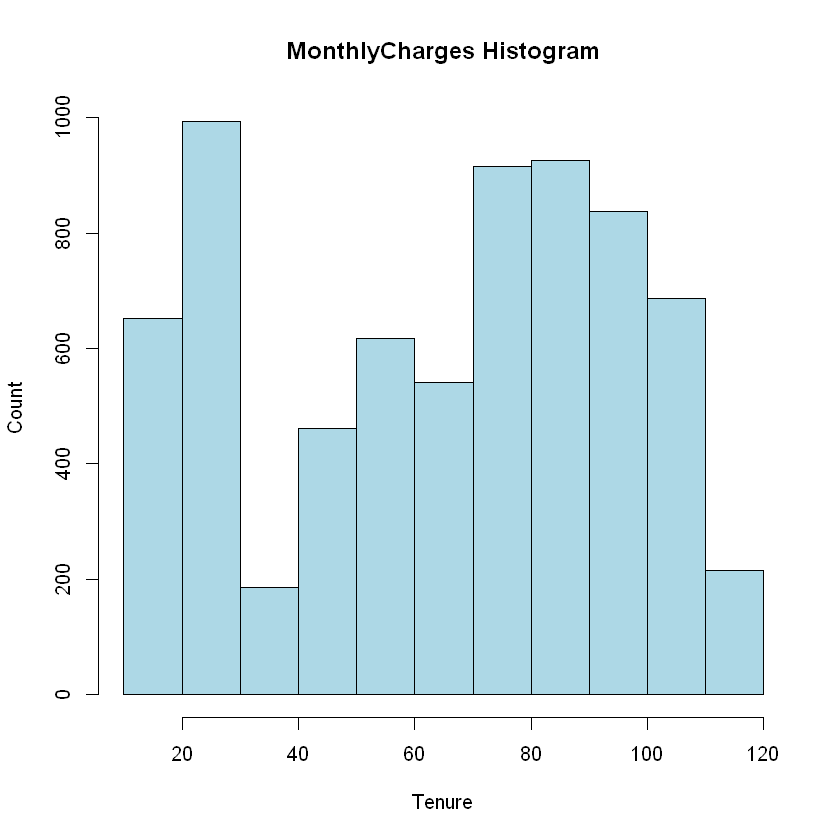

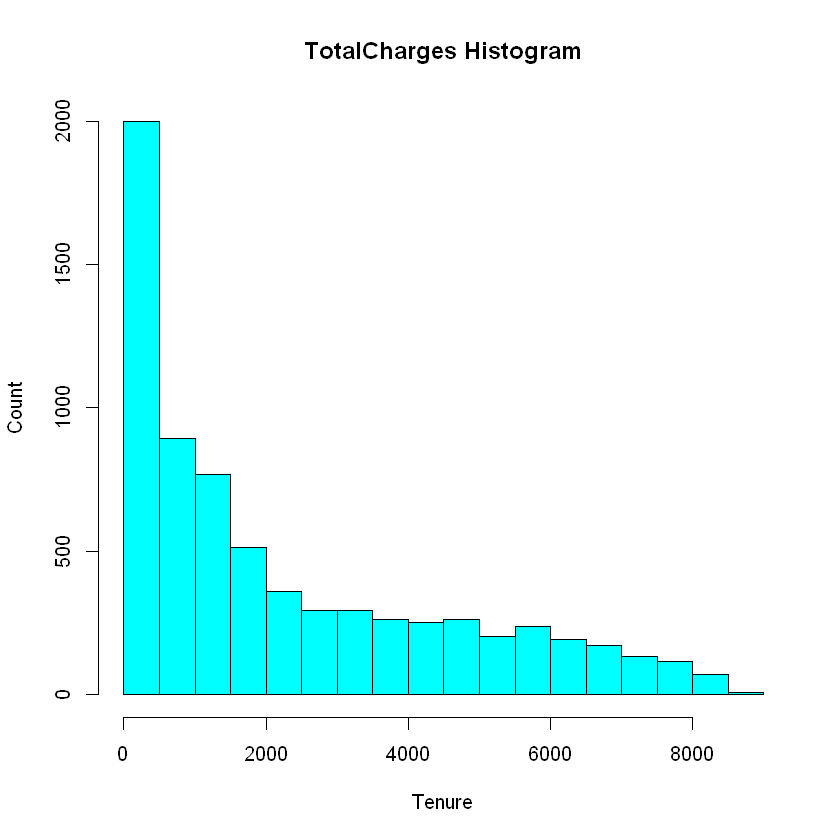

In [17]:
### Histogram of tenure, Monthlycharges and Total charges. ###
hist(churn_no_na$tenure,main="Tenure Histogram",col = "blue",xlab="Tenure",ylab="Count")
hist(churn_no_na$MonthlyCharges,main="MonthlyCharges Histogram",col = "lightblue",xlab="Tenure",ylab="Count")
hist(churn_no_na$TotalCharges,main="TotalCharges Histogram",col = "cyan",xlab="Tenure",ylab="Count")

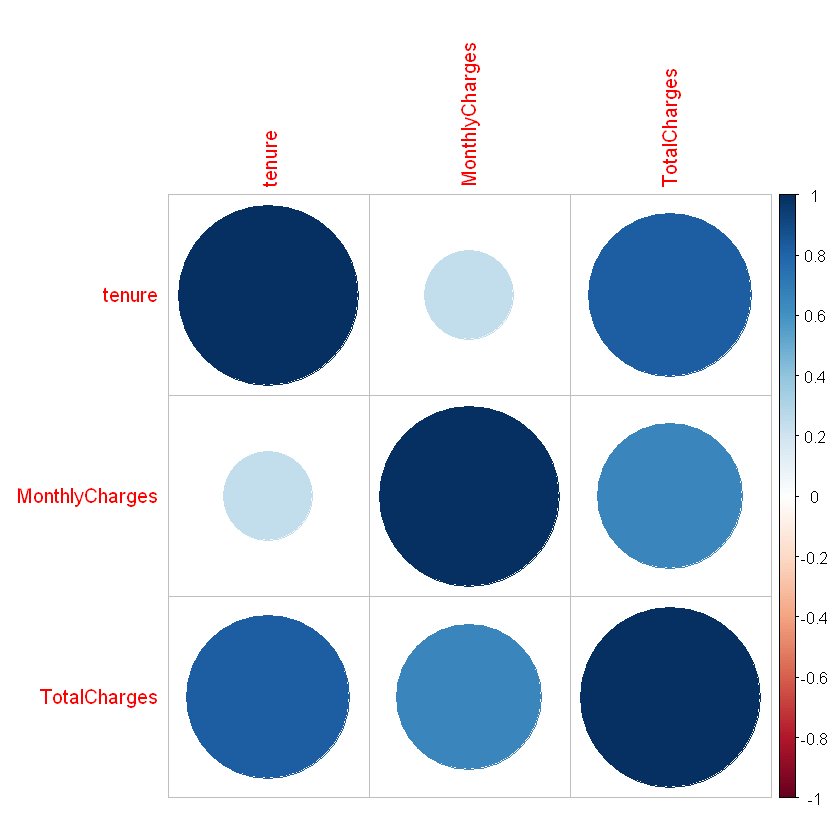

In [18]:
#### plot for correlation with colour bar and level #####
M = cor(churn_only_num)
corrplot(M)

In [19]:
### Conveting another no phone service" into "NO" services taken.###
churn_no_na$MultipleLines[churn_no_na$MultipleLines==  "No phone service"] <- 'No'

### Conveting another no phone service" into "NO" services taken.
churn_no_na$InternetService[churn_no_na$InternetService==  "No phone service"] <- 'No'

### Conveting another no internet service" into "NO" services taken.
churn_no_na$OnlineSecurity[churn_no_na$OnlineSecurity==  "No internet service"] <- 'No'
churn_no_na$OnlineBackup[churn_no_na$OnlineBackup==  "No internet service"] <- 'No'
churn_no_na$DeviceProtection[churn_no_na$DeviceProtection==  "No internet service"] <- 'No'
churn_no_na$TechSupport[churn_no_na$TechSupport==  "No internet service"] <- 'No'

### But it is not completely converting so changing values in the dataset.###

# Explanatory Analysis.

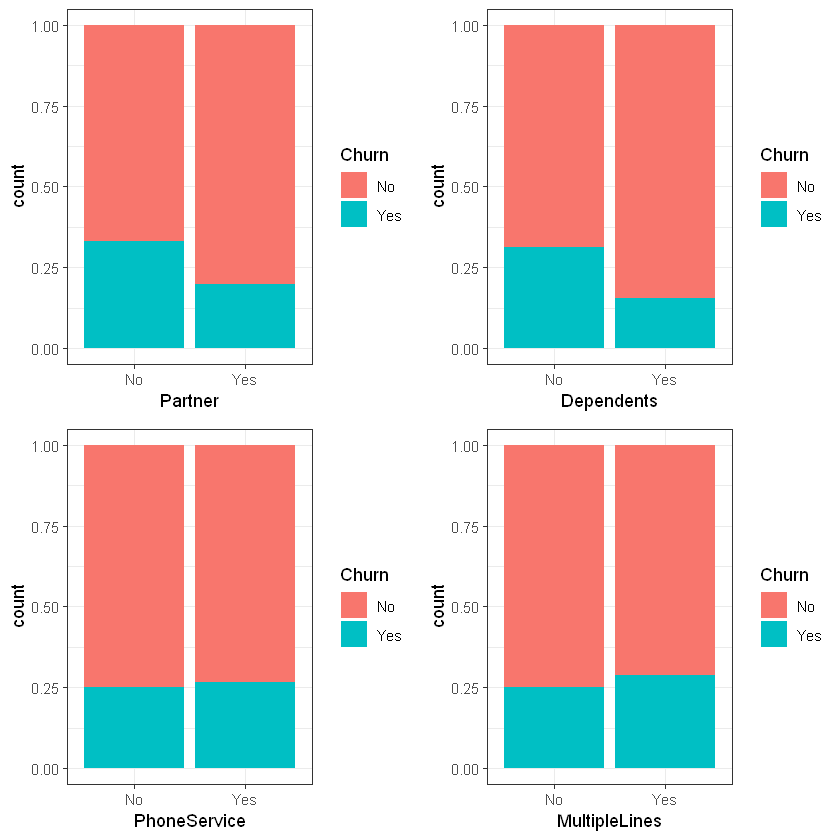

In [20]:
### Visulaizing and Plotting the graph for individual columns on the basis of Churn ###
plot_grid(
          ggplot(churn_no_na, aes(x=Partner,fill=Churn))+ 
          geom_bar(position = 'fill')+ 
          theme_bw()+scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(churn_no_na, aes(x=Dependents,fill=Churn))+ 
          geom_bar(position = 'fill')+ 
          theme_bw()+scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(churn_no_na, aes(x=PhoneService,fill=Churn))+ 
          geom_bar(position = 'fill')+ 
          theme_bw()+scale_x_discrete(labels = function(x) str_wrap(x, width = 10)), 
          ggplot(churn_no_na, aes(x=MultipleLines,fill=Churn))+ 
          geom_bar(position = 'fill')+ 
          theme_bw()+scale_x_discrete(labels = function(x) str_wrap(x, width = 10)))

#People those have partners and dependents have low churn rate.

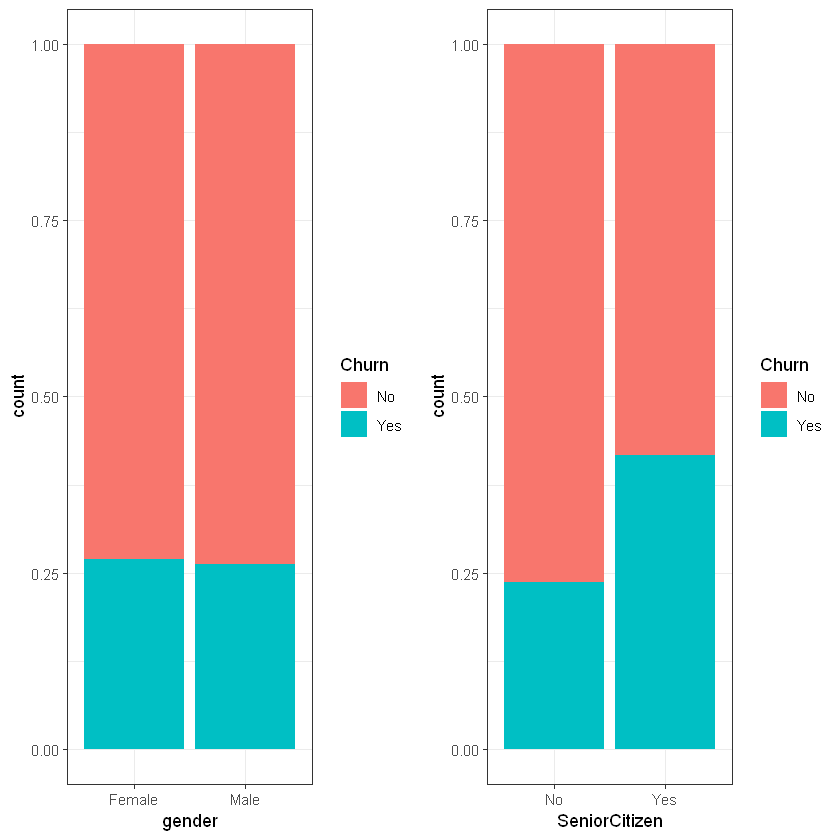

In [21]:
#### Visualize and plot the churn catogories by gender and Senior citizen. ####
plot_grid(ggplot(churn_no_na, aes(x=gender,fill=Churn))+ 
          geom_bar(position = 'fill')+ 
          theme_bw()+scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(churn_no_na, aes(x=SeniorCitizen,fill=Churn))+ 
          geom_bar(position = 'fill')+
          theme_bw()+scale_x_discrete(labels = function(x) str_wrap(x, width = 10)))                                                                                                                 

#Churn rate does not changed by genders and phone service.

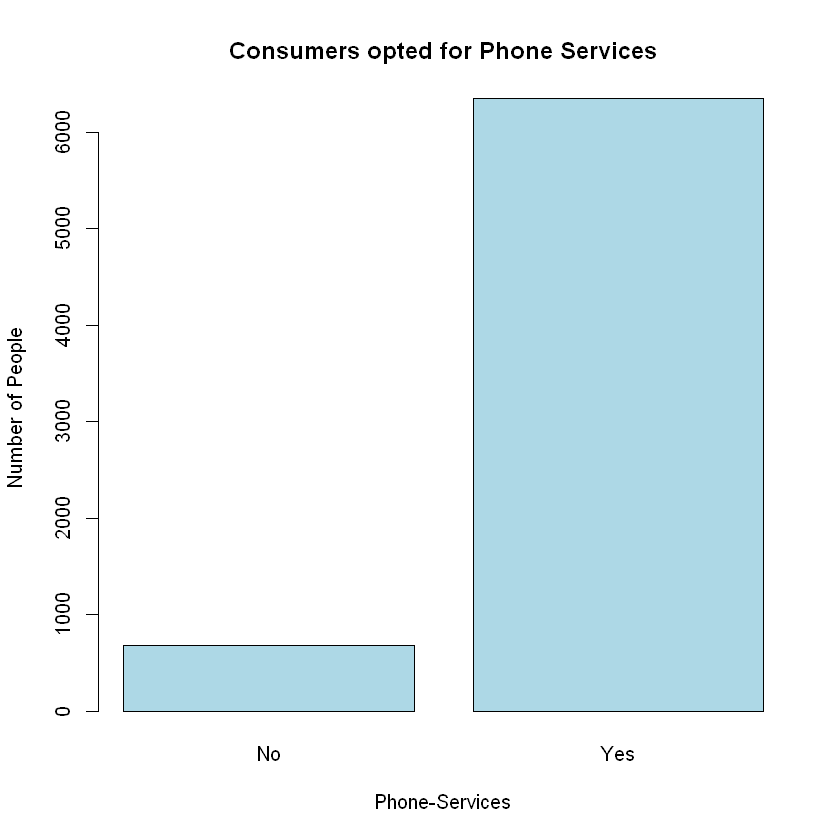

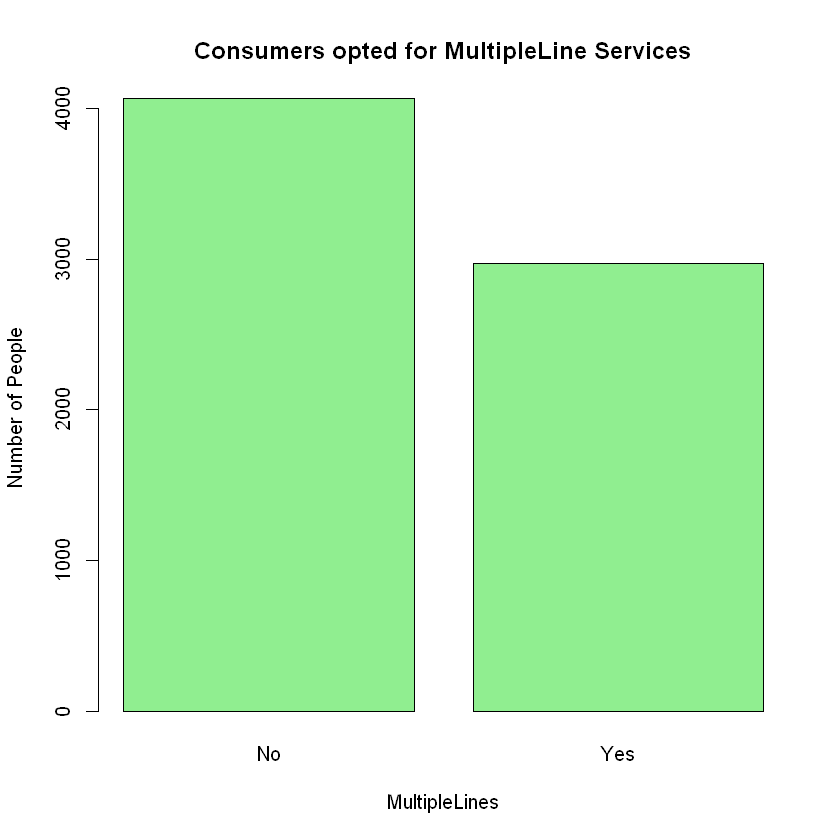

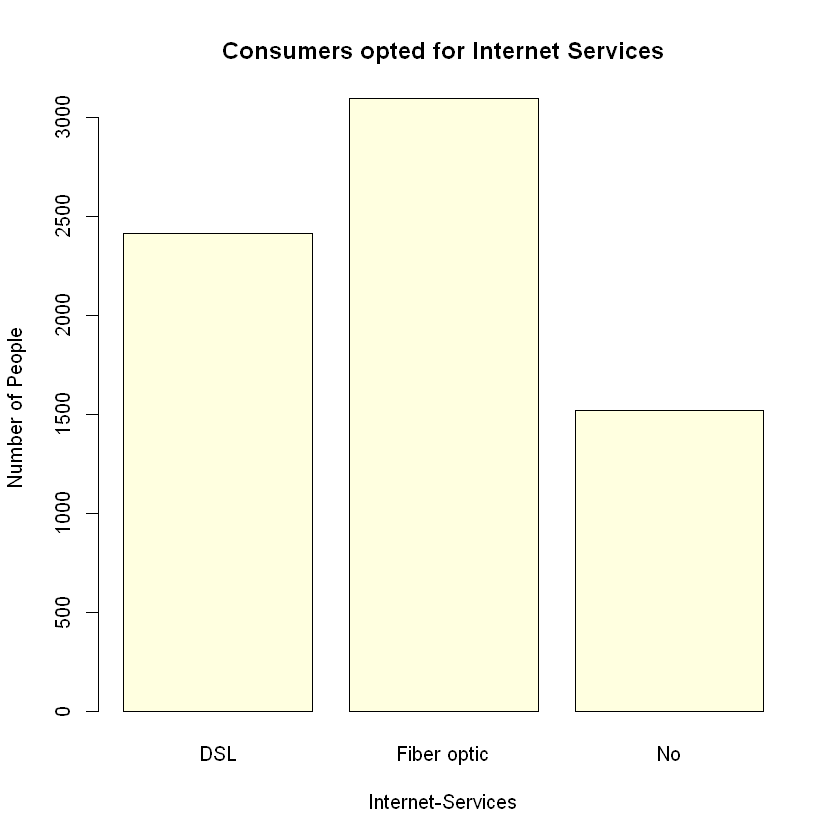

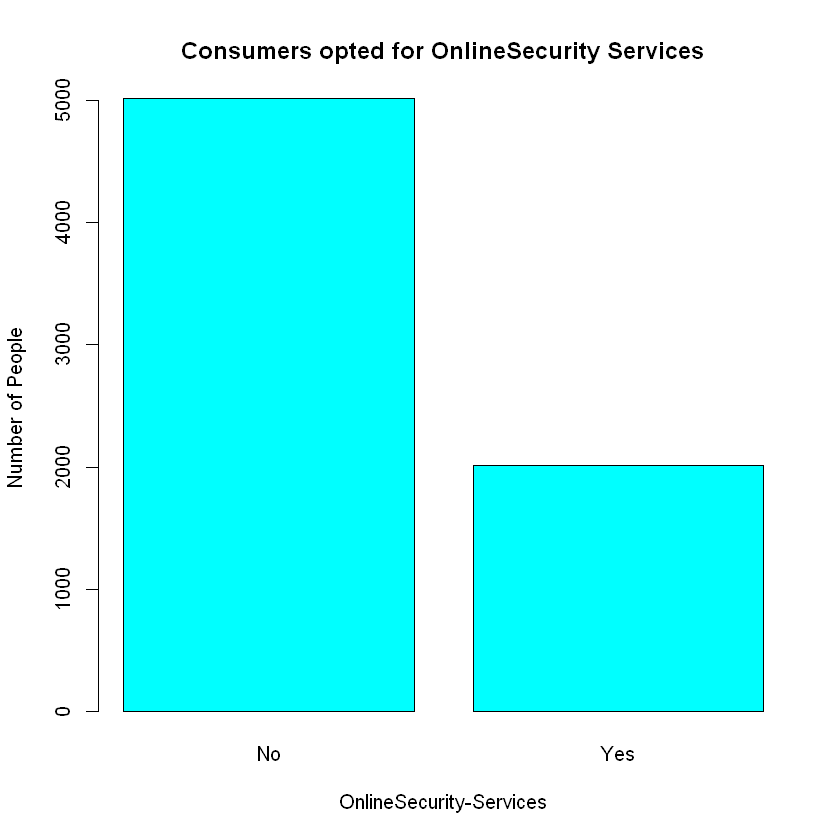

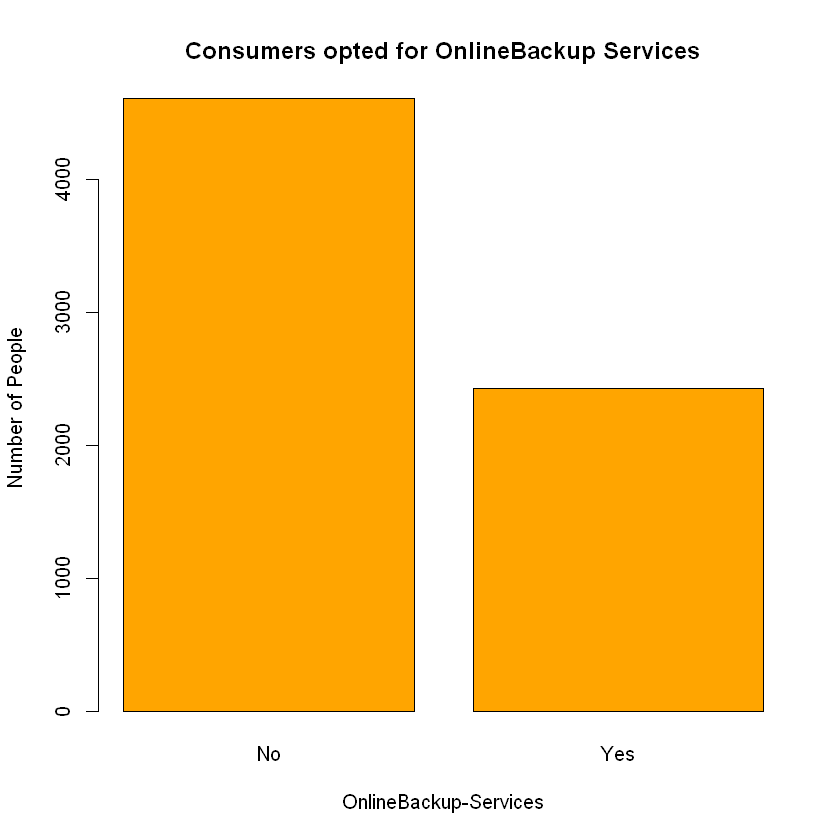

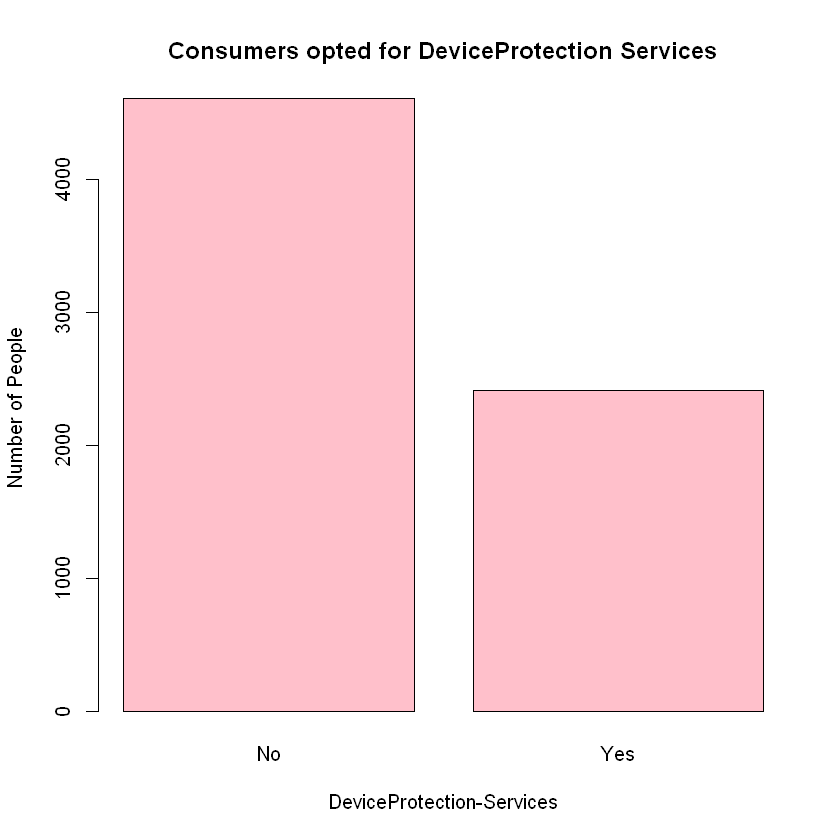

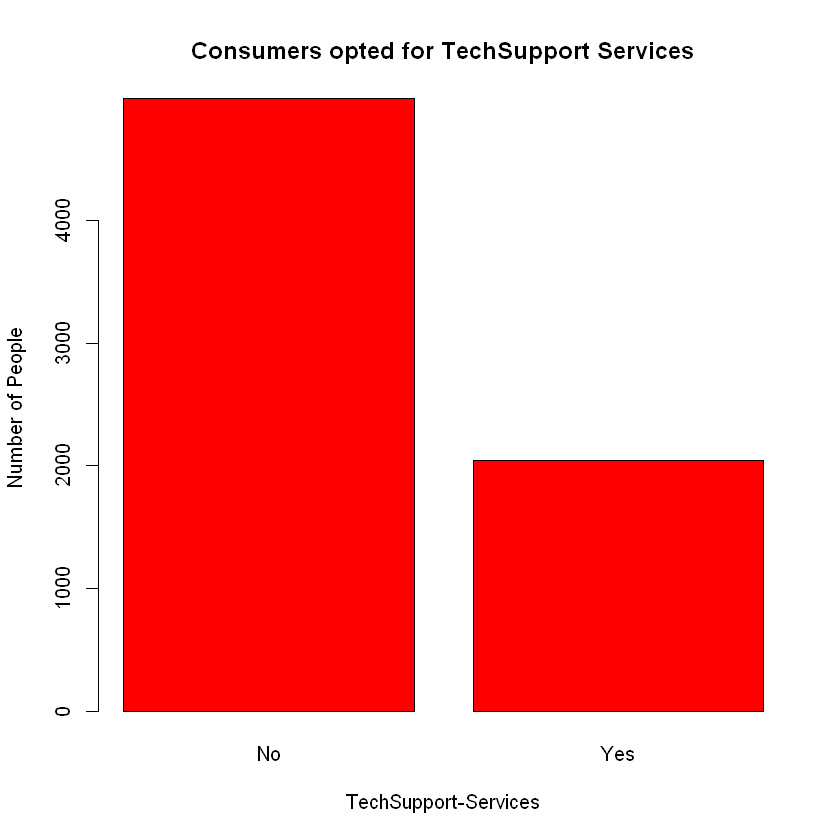

In [22]:
barplot(table(churn_no_na$PhoneService), main="Consumers opted for Phone Services", col="lightblue",xlab = "Phone-Services", ylab="Number of People")
barplot(table(churn_no_na$MultipleLines), main="Consumers opted for MultipleLine Services", col="lightgreen",xlab = "MultipleLines", ylab="Number of People")
barplot(table(churn_no_na$InternetService), main="Consumers opted for Internet Services", col="lightyellow",xlab = "Internet-Services", ylab="Number of People")
barplot(table(churn_no_na$OnlineSecurity), main="Consumers opted for OnlineSecurity Services", col="cyan",xlab = "OnlineSecurity-Services", ylab="Number of People")
barplot(table(churn_no_na$OnlineBackup), main="Consumers opted for OnlineBackup Services", col="orange",xlab = "OnlineBackup-Services", ylab="Number of People")
barplot(table(churn_no_na$DeviceProtection), main="Consumers opted for DeviceProtection Services", col="pink",xlab = "DeviceProtection-Services", ylab="Number of People")
barplot(table(churn_no_na$TechSupport), main="Consumers opted for TechSupport Services", col="red",xlab = "TechSupport-Services", ylab="Number of People")

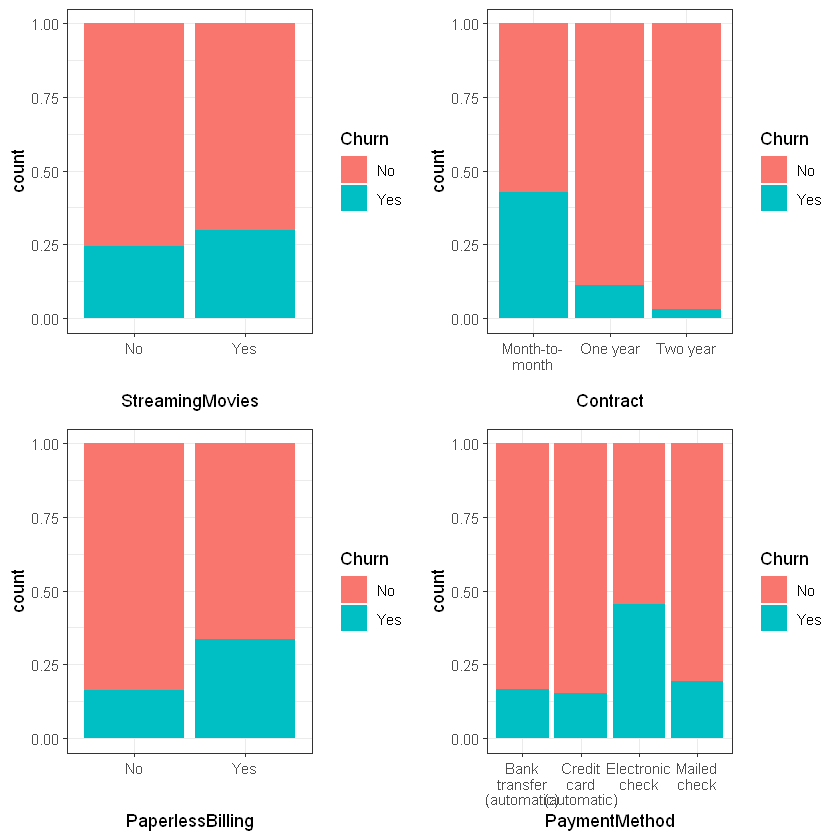

In [23]:
### Plotting graphs on the basis of Churn analysis. ###
plot_grid(ggplot(churn_no_na, aes(x=StreamingMovies,fill=Churn))+ 
          geom_bar(position = 'fill')+ theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)), 
          ggplot(churn_no_na, aes(x=Contract,fill=Churn))+ 
          geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(churn_no_na, aes(x=PaperlessBilling,fill=Churn))+ 
          geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(churn_no_na, aes(x=PaymentMethod,fill=Churn))+
          geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")

In [24]:
###Removing unnecessary columns. ###
cols_to_be_removed1=c("MonthlyCharges","customerID")
churn_no_na = churn_no_na[,!(names(churn_no_na) %in% cols_to_be_removed1) ]
str(churn_no_na)

'data.frame':	7032 obs. of  19 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : num  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 1 2 ...
 $ OnlineBackup    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 2 1 1 2 ...
 $ DeviceProtection: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ TechSupport     : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 2 1 ...
 $ StreamingTV     : Factor w/ 2 levels "No","Yes

In [25]:
### map the values to change from ("No" and "Yes") to ("0" and "1") ###

churn_no_na$PaperlessBilling <- as.factor(mapvalues(churn_no_na$PaperlessBilling, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$TechSupport <- as.factor(mapvalues(churn_no_na$TechSupport, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$StreamingMovies <- as.factor(mapvalues(churn_no_na$StreamingMovies, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$StreamingTV <- as.factor(mapvalues(churn_no_na$StreamingTV, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$PhoneService <- as.factor(mapvalues(churn_no_na$PhoneService, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$OnlineSecurity <- as.factor(mapvalues(churn_no_na$OnlineSecurity, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$OnlineBackup <- as.factor(mapvalues(churn_no_na$OnlineBackup, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$DeviceProtection <- as.factor(mapvalues(churn_no_na$DeviceProtection, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$Dependents <- as.factor(mapvalues(churn_no_na$Dependents, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$MultipleLines <- as.factor(mapvalues(churn_no_na$MultipleLines, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$Partner <- as.factor(mapvalues(churn_no_na$Partner, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$SeniorCitizen <- as.factor(mapvalues(churn_no_na$SeniorCitizen, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$Churn <- as.factor(mapvalues(churn_no_na$Churn, from=c("No","Yes"), to=c("0", "1")))

churn_no_na$gender <- as.factor(mapvalues(churn_no_na$gender, from=c("Female","Male"), to=c("0", "1")))

head(churn_no_na)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0
2,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,1889.50,0
3,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,108.15,1
4,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),1840.75,0
5,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,151.65,1
6,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,820.50,1


In [26]:
### Converting Factor to numeric. ###

churn_no_na$gender <-as.numeric(as.character(churn_no_na$gender))

churn_no_na$SeniorCitizen <-as.numeric(as.character(churn_no_na$SeniorCitizen))

churn_no_na$Partner <-as.numeric(as.character(churn_no_na$Partner))

churn_no_na$Dependents <-as.numeric(as.character(churn_no_na$Dependents))

churn_no_na$PhoneService <-as.numeric(as.character(churn_no_na$PhoneService))

churn_no_na$MultipleLines <-as.numeric(as.character(churn_no_na$MultipleLines))

churn_no_na$OnlineSecurity <-as.numeric(as.character(churn_no_na$OnlineSecurity))

churn_no_na$OnlineBackup <-as.numeric(as.character(churn_no_na$OnlineBackup))

churn_no_na$DeviceProtection <-as.numeric(as.character(churn_no_na$DeviceProtection))

churn_no_na$TechSupport <-as.numeric(as.character(churn_no_na$TechSupport))

churn_no_na$StreamingTV <-as.numeric(as.character(churn_no_na$StreamingTV))

churn_no_na$StreamingMovies <-as.numeric(as.character(churn_no_na$StreamingMovies))

churn_no_na$PaperlessBilling <-as.numeric(as.character(churn_no_na$PaperlessBilling))

churn_no_na$Churn <-as.numeric(as.character(churn_no_na$Churn))



In [27]:
str(churn_no_na)

'data.frame':	7032 obs. of  19 variables:
 $ gender          : num  0 1 1 1 0 0 1 0 0 1 ...
 $ SeniorCitizen   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : num  1 0 0 0 0 0 0 0 1 0 ...
 $ Dependents      : num  0 0 0 0 0 0 1 0 0 1 ...
 $ tenure          : num  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : num  0 1 1 0 1 1 1 0 1 1 ...
 $ MultipleLines   : num  0 0 0 0 0 1 1 0 1 0 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : num  0 1 1 1 0 0 0 1 0 1 ...
 $ OnlineBackup    : num  1 0 1 0 0 0 1 0 0 1 ...
 $ DeviceProtection: num  0 1 0 1 0 1 0 0 1 0 ...
 $ TechSupport     : num  0 0 0 1 0 0 0 0 1 0 ...
 $ StreamingTV     : num  0 0 0 0 0 1 1 0 1 0 ...
 $ StreamingMovies : num  0 0 0 0 0 1 0 0 1 0 ...
 $ Contract        : Factor w/ 3 levels "Month-to-month",..: 1 2 1 2 1 1 1 1 1 2 ...
 $ PaperlessBilling: num  1 0 1 0 1 1 1 0 1 0 ...
 $ PaymentMethod   : Factor w/ 4 levels "Bank transfer (automatic)",..: 3 4 4 1

# Model Application Phase.

In [ ]:
### Splitting the dataset into train and test dataset.
set.seed(1000)

#use 70% of dataset as training set and 30% as test set
s <- sample(c(TRUE, FALSE), nrow(churn_no_na), replace=TRUE, prob=c(0.7,0.3))
train  <- churn_no_na[s, ]
test   <- churn_no_na[!s, ]

#Logistic Regression Model.

In [ ]:
model_lrm <- glm(Churn~. , family="binomial", data = train)
summary(model_lrm)

In [ ]:
res <- predict(model_lrm, test, type='response')
tab <- table(Actualvalue = test$Churn, Predictedvalue=res>0.5)
print(tab)

In [ ]:
paste("Accuracy:", round((sum(diag(tab))/sum(tab))*100,2))

In [ ]:
model_lrm2 <- glm(Churn~ PaymentMethod + PaperlessBilling + Contract + Contract + 
                 InternetService+ InternetService + SeniorCitizen+ MultipleLines+
                 tenure+ SeniorCitizen +TotalCharges, family="binomial", data = train)
summary(model_lrm2)

In [ ]:
res2 <- predict(model_lrm2, test, type='response')
tab2 <- table(Actualvalue = test$Churn, Predictedvalue=res2>0.5)
print(tab2)

In [ ]:
paste("Accuracy:", round((sum(diag(tab2))/sum(tab2))*100,2))

In [ ]:
### ROC Curve to assess the diagnostic performance of a test. (Logistic algorithm) by plotting TPRs and FPRs.###

roc_object_lrm <- roc(response=test$Churn, predictor= factor(res, ordered = TRUE), plot=TRUE, xlab="False Positive", ylab="True Positive", lwd=4, col="#FF0000",print.auc= TRUE)
plot(roc_object_lrm)

#By variating the ROC score we find out thar at 0.5 is the value where we are getting better accuracy. 

#Decision Tree implementation.

In [ ]:
model_dt <- rpart(Churn~. ,  data = train)
model_dt

In [ ]:
### Plotting the tree and margin is used to adjust the size of the plot, for viewing label we used text function. ###
plot(model_dt, margin = 0.1)
text(model_dt, use.n=TRUE, pretty=TRUE, cex =0.8)

In [ ]:
pred_dt<- predict(model_dt, test)
pred_dt

In [ ]:
#### Table for Actual and Predicted values are created. ###

library(caret)
library(tidyverse)
tab_dt = table(test$Churn, pred_dt)
tab_dt

In [ ]:
paste("Accuracy:", round((sum(diag(tab_dt))/sum(tab_dt))*100,2))

#Accuracy for Decision Tree is 44.2%
#WORST PERFORMANCE.

In [ ]:
### ROC Curve to assess the diagnostic performance of a test. (Support Vector Machine) by plotting TPRs and FPRs.###

roc_object_svm <- roc(response=test$Churn, predictor= factor(pred_dt, ordered = TRUE), plot=TRUE, xlab="False Positive", ylab="True Positive", lwd=4, col="#0d8bfc",print.auc= TRUE)
plot(roc_object_svm)

#Support Vector Implementation.

In [ ]:
### Support Vector Implementation. ###
library(e1071)
model_svm = svm(formula = Churn ~ ., data = train, kernel = 'linear')
summary(model_svm)

In [ ]:
pred_svm = predict(model_svm, newdata = test)
tab_svm <- table(Actualvalue = test$Churn, Predictedvalue=pred_svm)
print(tab_svm)

In [ ]:
paste("Accuracy:", round((sum(diag(tab_dt))/sum(tab_svm))*100,2))

###Support Vector Machine is giving accuracy of 44.2%.
#WORST PERFORMANCE.

In [ ]:
### ROC Curve to assess the diagnostic performance of a test. (Support Vector Machine) by plotting TPRs and FPRs.###

roc_object_svm <- roc(response=test$Churn, predictor= factor(pred_svm, ordered = TRUE), plot=TRUE, xlab="False Positive", ylab="True Positive", lwd=4, col="#400dfc",print.auc= TRUE)
plot(roc_object_svm)